In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('lightning_logs/version_1/metrics.csv')

In [3]:
df

,d_loss,epoch,error,f_loss,g_loss,o_std,step,t_std
0,5250.267578,0,54.830254,8800.052734,0.230839,0.099010,1,0.099900
1,4505.265625,0,48.520550,8405.796875,0.752513,0.098028,3,0.100249
2,4169.814941,0,54.317570,6983.050293,1.570375,0.097171,5,0.101191
3,2524.595947,0,48.028522,23909.574219,4.092813,0.096289,7,0.101038
4,4929.101562,0,57.379261,8809.266602,6.008020,0.095400,9,0.101371
...,...,...,...,...,...,...,...,...
16109,860.380432,3,126.701836,3225.745117,127.060112,0.051931,32219,0.114320
16110,1985.007202,3,116.993027,2043.694214,100.650597,0.052017,32221,0.114619
16111,3566.499756,3,124.531349,2681.896729,119.679054,0.052017,32223,0.114682
16112,6156.742676,3,169.231812,3421.542725,174.924561,0.052065,32225,0.114544


In [4]:
import numpy as np

def moving_average(a, n=10):
    ret = np.cumsum(np.asarray(a))
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

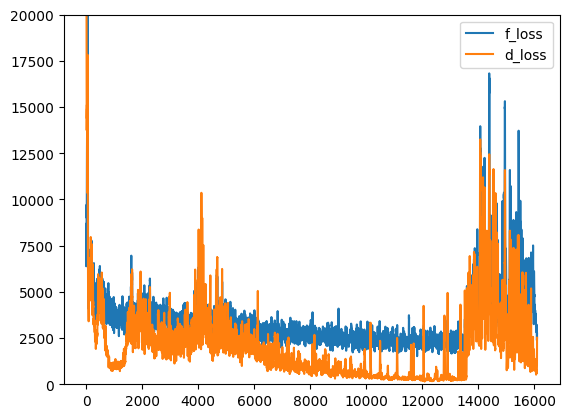

In [5]:
plt.plot(moving_average(df['f_loss']), label='f_loss')
plt.plot(moving_average(df['d_loss']), label='d_loss')
plt.ylim(0, 20000)
plt.legend()

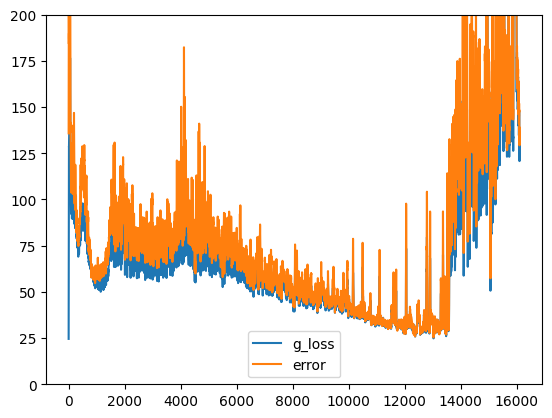

In [6]:
plt.plot(moving_average(df['g_loss']), label='g_loss')
plt.plot(moving_average(df['error']), label='error')
plt.ylim(0, 200)
plt.legend()

In [20]:
from train import unnormalize_control, normalize_control
import torch

In [1]:
from train import PinkTromboneModel
model = PinkTromboneModel()

In [2]:
model.setup("train")
train_loader = model.train_dataloader()
batch = next(iter(train_loader))

In [3]:
target = model.transform(batch)

In [30]:
control = model.encoder(target)
control = torch.sigmoid(control)

In [26]:
unnormalized = unnormalize_control(control)

In [29]:
control[9, 5:, 123]

tensor([ 1.4057e-03,  1.3560e-01, -1.6135e-01, -2.7990e-05,  2.3007e-02,
         8.0259e-02,  9.6139e-03, -5.7274e-03,  8.3553e-04, -1.2915e-01,
         4.6293e-02, -2.4947e-02,  6.7389e-03, -4.0919e-02,  4.4765e-02,
        -6.3267e-02,  1.9885e-01,  2.0050e-01,  1.4881e-01, -1.5961e-01,
         1.3475e-01,  1.3661e-01, -1.8614e-01,  1.4210e-02, -5.9693e-02,
         1.3859e-02, -9.3781e-02,  1.5322e-02,  2.6630e-01, -9.6117e-02,
        -4.9995e-02, -1.1073e-01, -2.7602e-02, -1.5438e-01, -4.6414e-02,
        -1.2029e-01, -2.5378e-01,  9.7708e-02, -7.5484e-02, -7.3007e-02,
        -1.4758e-01,  2.1053e-01, -1.5201e-01, -4.7649e-02],
       grad_fn=<SelectBackward0>)

In [28]:
unnormalized[9, 5:, 123]

tensor([-0.0978,  0.1170, -0.3582, -0.1000, -0.0632,  0.0284, -0.0846, -0.1092,
        -0.0987, -0.3066, -0.0259, -0.1399, -0.0892, -0.1655, -0.0284, -0.2012,
         0.2182,  0.2208,  0.1381, -0.3554,  0.1156,  0.1186, -0.3978, -0.0773,
        -0.1955, -0.0778, -0.2500, -0.0755,  0.3261, -0.2538, -0.1800, -0.2772,
        -0.1442, -0.3470, -0.1743, -0.2925, -0.5061,  0.0563, -0.2208, -0.2168,
        -0.3361,  0.2368, -0.3432, -0.1762], grad_fn=<SelectBackward0>)

In [10]:
target.std()

tensor(11.0081)

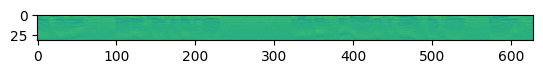

In [7]:
plt.imshow(target[0])